<a href="https://colab.research.google.com/github/peibanlioulang/Data-Analysis-Project/blob/main/TwiterTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import wordcloud
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import string
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pickle
with open("frozen2_full.txt", "rb") as fp:   # Unpickling
    data = pickle.load(fp)

In [ ]:
print(data[0])

RT @atulmohanhere: Average Weekend Occupancy At National Multiplexes in % (6-8 December)
#Panipat 32%
#PatiPatniAurWoh 44%
#Commando3 28%
#…


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
import numpy as np
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")

    return lst

In [ ]:
frozen2 =clean_tweets(data)

In [ ]:
frozen2[0]

' Average Weekend Occupancy At National Multiplexes in % (6-8 December)\n#Panipat 32%\n#PatiPatniAurWoh 44%\n#Commando3 28%\n#…'

In [ ]:
print(frozen2)

[' Average Weekend Occupancy At National Multiplexes in % (6-8 December)\n#Panipat 32%\n#PatiPatniAurWoh 44%\n#Commando3 28%\n#…'
 ' sorry, my hand slipped -\n\n#Frozen2  #TangledTheSeries '
 ' ❝Are there others? Are they here, too? I want to know! Come and show me!❞\n- Into The Unknown (ger.)\n\n#frozen2spoilers #Fro…'
 ...
 ' #Frozen2 has been nominated for 2 Golden Globe Awards, including Best Animated Feature and Best Original Song “Into the U…'
 ' #Frozen2 has been nominated for 2 Golden Globe Awards, including Best Animated Feature and Best Original Song “Into the U…'
 ' Average Weekend Occupancy At National Multiplexes in % (6-8 December)\n#Panipat 32%\n#PatiPatniAurWoh 44%\n#Commando3 28%\n#…']


In [ ]:
df_frozen2 = pd.DataFrame(frozen2, columns=['text']) 

In [ ]:
print(df_frozen2.head(10))

                                                text
0   Average Weekend Occupancy At National Multipl...
1   sorry, my hand slipped -\n\n#Frozen2  #Tangle...
2   ❝Are there others? Are they here, too? I want...
3   My original post disappeared for some reason,...
4   Average Weekend Occupancy At National Multipl...
5                    Elsa Knight \n#frozen #Frozen2 
6  Woohooo!! Two Golden Globe nominations for thi...
7   Average Weekend Occupancy At National Multipl...
8   #Frozen2 scored another $34.7 million this we...
9   #Frozen2 has been nominated for 2 Golden Glob...


In [ ]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
df_frozen2=pd.DataFrame(df_frozen2.text.apply(round1))
df_frozen2.head(100)

,text
0,average weekend occupancy at national multipl...
1,sorry my hand slipped tangledtheseries
2,❝are there others are they here too i want to...
3,my original post disappeared for some reason ...
4,average weekend occupancy at national multipl...
...,...
95,and it feels like i am home❄️
96,congratulations to golden globe nominees ford...
97,my original post disappeared for some reason ...
98,has been nominated for golden globe awards ...


In [ ]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('frozen', '', text)
    text = re.sub('❄️', '', text)
    text = re.sub('⭐⭐⭐⭐⭐', '', text)
    text = re.sub('❄✨❄✨', '', text)
    text = re.sub('🥰', '', text)
    
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
df_frozen2=pd.DataFrame(df_frozen2.text.apply(round2))
df_frozen2.head(100)

,text
0,average weekend occupancy at national multipl...
1,sorry my hand slipped tangledtheseries
2,❝are there others are they here too i want to...
3,my original post disappeared for some reason ...
4,average weekend occupancy at national multipl...
...,...
95,and it feels like i am home
96,congratulations to golden globe nominees ford...
97,my original post disappeared for some reason ...
98,has been nominated for golden globe awards ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_frozen2.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_frozen2.index
data_dtm.head()

,abeautifuldayintheneighborhood,able,abt,accidentally,ace,act,activities,actually,ad,add,added,adding,adores,aduthasattai,advancement,adventcompetition,adventure,agnarr,ago,ah,ahead,ajsksk,aladdin,alam,alitabattleangel,allnewsongs,allowed,amazing,amp,anchored,ang,animated,animation,anna,anne,announced,answers,anymore,appreciation,arendelle,...,years,yeartheir,yes,yesterday,yesterdaythey,yo,youdive,youll,youre,youtube,youve,ふなのりおえかき,アナと雪の女王,アナ雪,마마무,선율sunyoul,숨겨진세상,태연,𝑬𝒍𝒔𝒂𝒔,𝑻𝒉𝒆𝒚,𝒂𝒎,𝒃𝒖𝒕,𝒄𝒐𝒎𝒆,𝒇𝒂𝒓,𝒉𝒆𝒓𝒆,𝒊𝒏𝒏𝒐𝒄𝒆𝒏𝒕,𝒍𝒐𝒏𝒈𝒆𝒓𝒕𝒓𝒆𝒎𝒃𝒍𝒊𝒏𝒈,𝒍𝒐𝒗𝒆,𝒏𝒐,𝒑𝒆𝒕,𝒔𝒆𝒆𝒎,𝒔𝒉𝒐𝒘,𝒔𝒐,𝒗𝒆,𝒚𝒐𝒖𝒓𝒔𝒆𝒍𝒇,𝘶𝘯𝘤𝘰𝘯𝘥𝘪𝘵𝘪𝘰𝘯𝘢𝘭𝘭𝘺,𝙗𝙪𝙧𝙣,𝙝𝙚𝙡𝙡,𝙡𝙞𝙠𝙚,𝙩𝙝𝙚𝙮
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(data_dtm.columns)

Index(['abeautifuldayintheneighborhood', 'able', 'abt', 'accidentally', 'ace',
       'act', 'activities', 'actually', 'ad', 'add',
       ...
       '𝒔𝒆𝒆𝒎', '𝒔𝒉𝒐𝒘', '𝒔𝒐', '𝒗𝒆', '𝒚𝒐𝒖𝒓𝒔𝒆𝒍𝒇', '𝘶𝘯𝘤𝘰𝘯𝘥𝘪𝘵𝘪𝘰𝘯𝘢𝘭𝘭𝘺', '𝙗𝙪𝙧𝙣',
       '𝙝𝙚𝙡𝙡', '𝙡𝙞𝙠𝙚', '𝙩𝙝𝙚𝙮'],
      dtype='object', length=1164)


In [ ]:
import numpy as np
data=np.array(data_dtm)
sum=data.sum(axis=0)
print(sum.shape)

(1164,)


In [ ]:
sum = sum.tolist()
print(sum)

[1, 1, 1, 52, 2, 1, 1, 7, 1, 1, 1, 2, 1, 150, 1, 5, 2, 1, 5, 1, 4, 2, 1, 3, 2, 1, 1, 4, 16, 1, 1, 355, 9, 60, 2, 3, 1, 1, 1, 8, 1, 1, 2, 111, 35, 1, 2, 11, 1, 1, 2, 7, 1, 5, 1, 2, 2, 1, 1, 2, 3, 1, 1, 4, 1, 298, 9, 1, 1, 346, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 97, 1, 1, 13, 3, 1, 2, 1, 2, 1, 1, 708, 1, 6, 1, 1, 160, 3, 6, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 5, 8, 4, 1, 2, 1, 1, 2, 11, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 11, 91, 1, 2, 1, 1, 3, 1, 4, 1, 2, 6, 7, 2, 1, 1, 1, 1, 9, 1, 1, 1, 1, 2, 30, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 8, 1, 3, 1, 1, 1, 172, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 5, 1, 1, 1, 1, 31, 1, 1, 3, 1, 1, 2, 1, 5, 1, 2, 5, 9, 1, 1, 1, 1, 5, 2, 1, 5, 10, 155, 148, 1, 3, 1, 52, 1, 1, 5, 6, 1, 1, 1, 2, 5, 5, 1, 1, 1, 52, 1, 13, 30, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 5, 1, 1, 5, 1, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 13, 383, 3, 2, 5, 1, 2, 6, 2, 4, 1, 16, 5, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1

In [ ]:
import heapq

max_number = heapq.nlargest(50, sum) 
max_index = []
for t in max_number:
    index = sum.index(t)
    max_index.append(index)
    sum[index] = 0
    
print(max_number)
print(max_index)

[708, 489, 488, 457, 441, 383, 359, 356, 355, 348, 346, 326, 307, 307, 300, 298, 278, 246, 184, 175, 172, 171, 160, 155, 150, 150, 148, 119, 111, 97, 92, 92, 91, 91, 90, 90, 90, 75, 74, 68, 68, 68, 68, 60, 59, 55, 54, 52, 52, 52]
[96, 401, 395, 692, 896, 289, 660, 334, 31, 489, 69, 1074, 645, 673, 637, 65, 403, 528, 977, 363, 194, 663, 101, 233, 13, 711, 234, 579, 43, 85, 387, 661, 149, 405, 815, 912, 976, 785, 482, 425, 885, 903, 956, 33, 964, 743, 825, 3, 238, 252]


In [ ]:
Top_words=[]
for i in (max_index):
    word = data_dtm.columns[i]
    Top_words.append(word)
print(Top_words)   

['best', 'golden', 'globe', 'original', 'song', 'elsa', 'nominated', 'feature', 'animated', 'including', 'awards', 'weekend', 'national', 'occupancy', 'multiplexes', 'average', 'goldenglobes', 'knight', 'thelionking', 'fordvferrari', 'congratulations', 'nominees', 'bigil', 'december', 'aduthasattai', 'patipatniaurwoh', 'decemberpanipat', 'love', 'arjunsu', 'beautiful', 'ghosts', 'nominations', 'cats', 'gonna', 'rocketman', 'spirit', 'theli', 'really', 'im', 'hand', 'slipped', 'sorry', 'tangledtheseries', 'anna', 'th', 'post', 'sad', 'accidentally', 'deleted', 'disappeared']


In [ ]:
def word_cloud(Top_words):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in Top_words])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

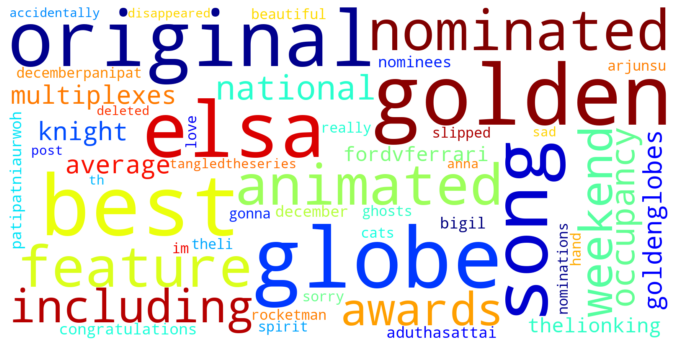

In [ ]:
word_cloud(Top_words)